In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')
import absorption_line_vel as vel
from absorption_line_vel import SpectrumSN_Lines, AbsorbLine

# read spec data
z = 0.0307
spec = '../../spectroscopy/ZTF20aayhacx_20200610_P200_v1.ascii'
Spec1 = SpectrumSN_Lines(spec, z)

../absorption_line_vel.py:86: UserWarning: No flux uncertainty in the datafile!
  warnings.warn("No flux uncertainty in the datafile!")


# 20200610_P200

## Si II 6355

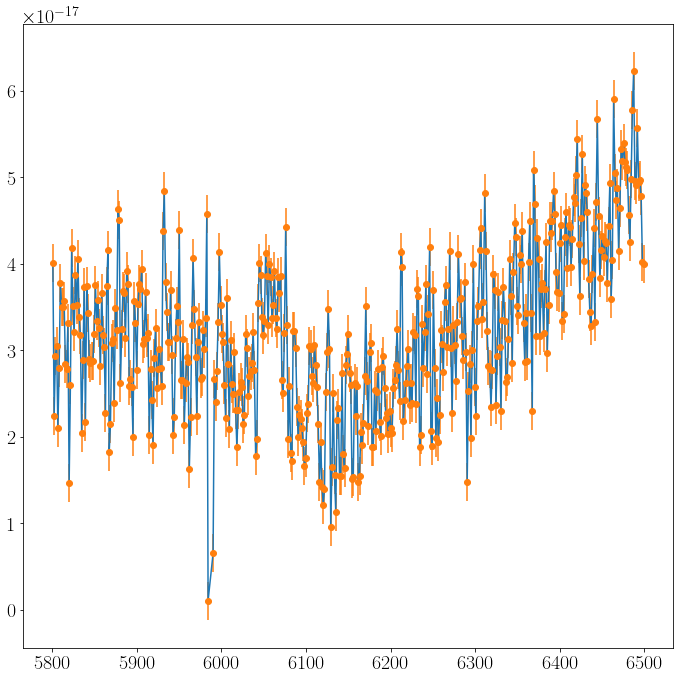

In [3]:
Spec1.plot_line_region(5800, 6500)

In [ ]:
Spec1.add_line('SiII_6355', 5900, 6400, lines=[6371.359, 6347.103])

In [ ]:
Spec1.line['SiII_6355'].LS_estimator()

In [ ]:
sampler = Spec1.line['SiII_6355'].MCMC_sampler()

In [ ]:
vel.plot_MCMC(sampler, 200)

## Ca II IRT

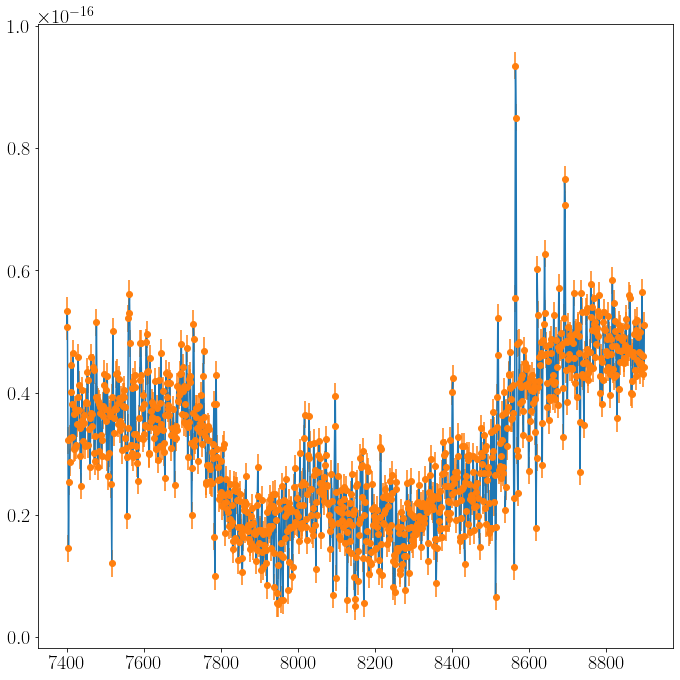

In [3]:
Spec1.plot_line_region(7400, 8900)

In [4]:
Spec1.add_line('CaII_IRT', 7400, 8900, lines=[8498.018, 8542.089, 8662.140])

1012 points within 7400.00 and 8900.00 angstroms.


../absorption_line_vel.py:86: UserWarning: No flux uncertainty in the datafile!
  warnings.warn("No flux uncertainty in the datafile!")


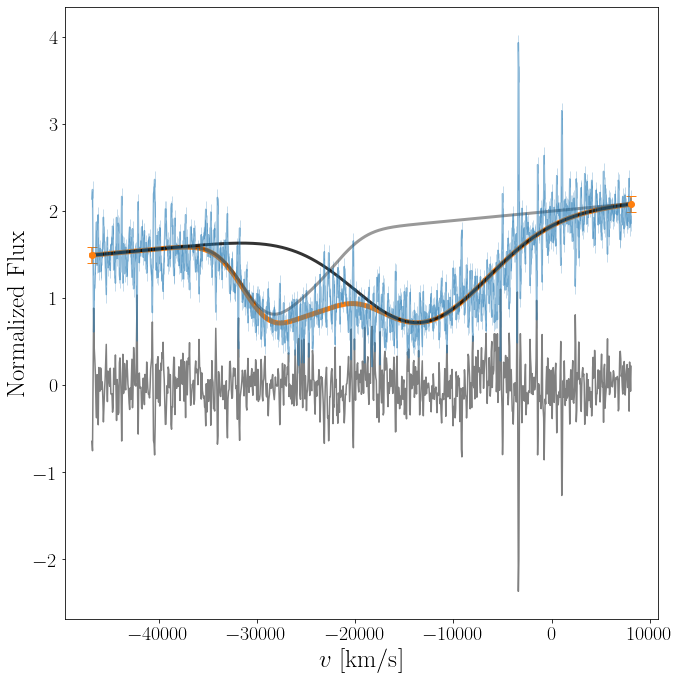

LS estimation:
Velocity pvf: -9881 km/s
Velocity hvf: -23861 km/s


In [5]:
Spec1.line['CaII_IRT'].LS_estimator(guess=(1, 1, -10000, 15, -1000, -25000, 15, -1000))

  0%|          | 1/1000 [00:00<01:40,  9.94it/s]

Normalize factor = 3.037


  0%|          | 2/50000 [00:00<55:05, 15.13it/s]

MCMC results:
Velocity pvf: -9916 pm 421 km/s
Velocity hvf: -23941 pm 274 km/s
Normalize factor = 3.037


  9%|▉         | 4500/50000 [03:33<36:02, 21.04it/s]  


MCMC results:
Velocity pvf: -9874 pm 233 km/s
Velocity hvf: -23913 pm 210 km/s


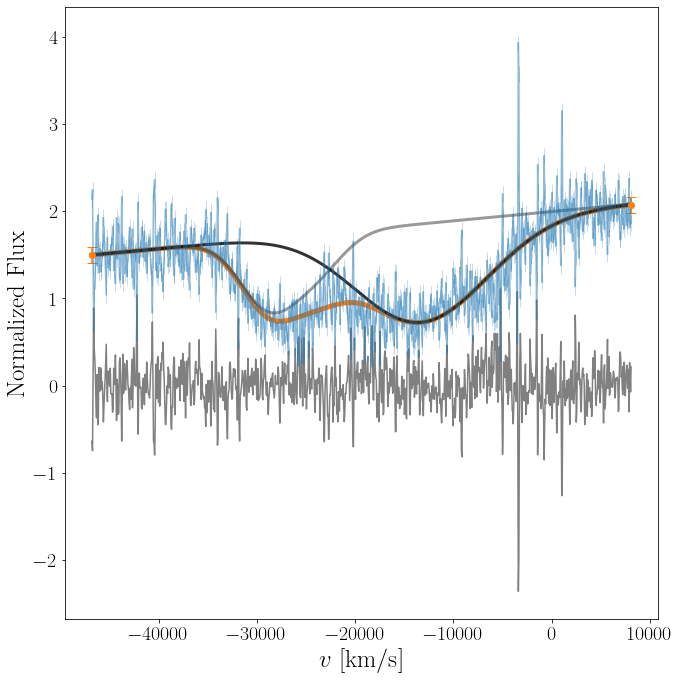

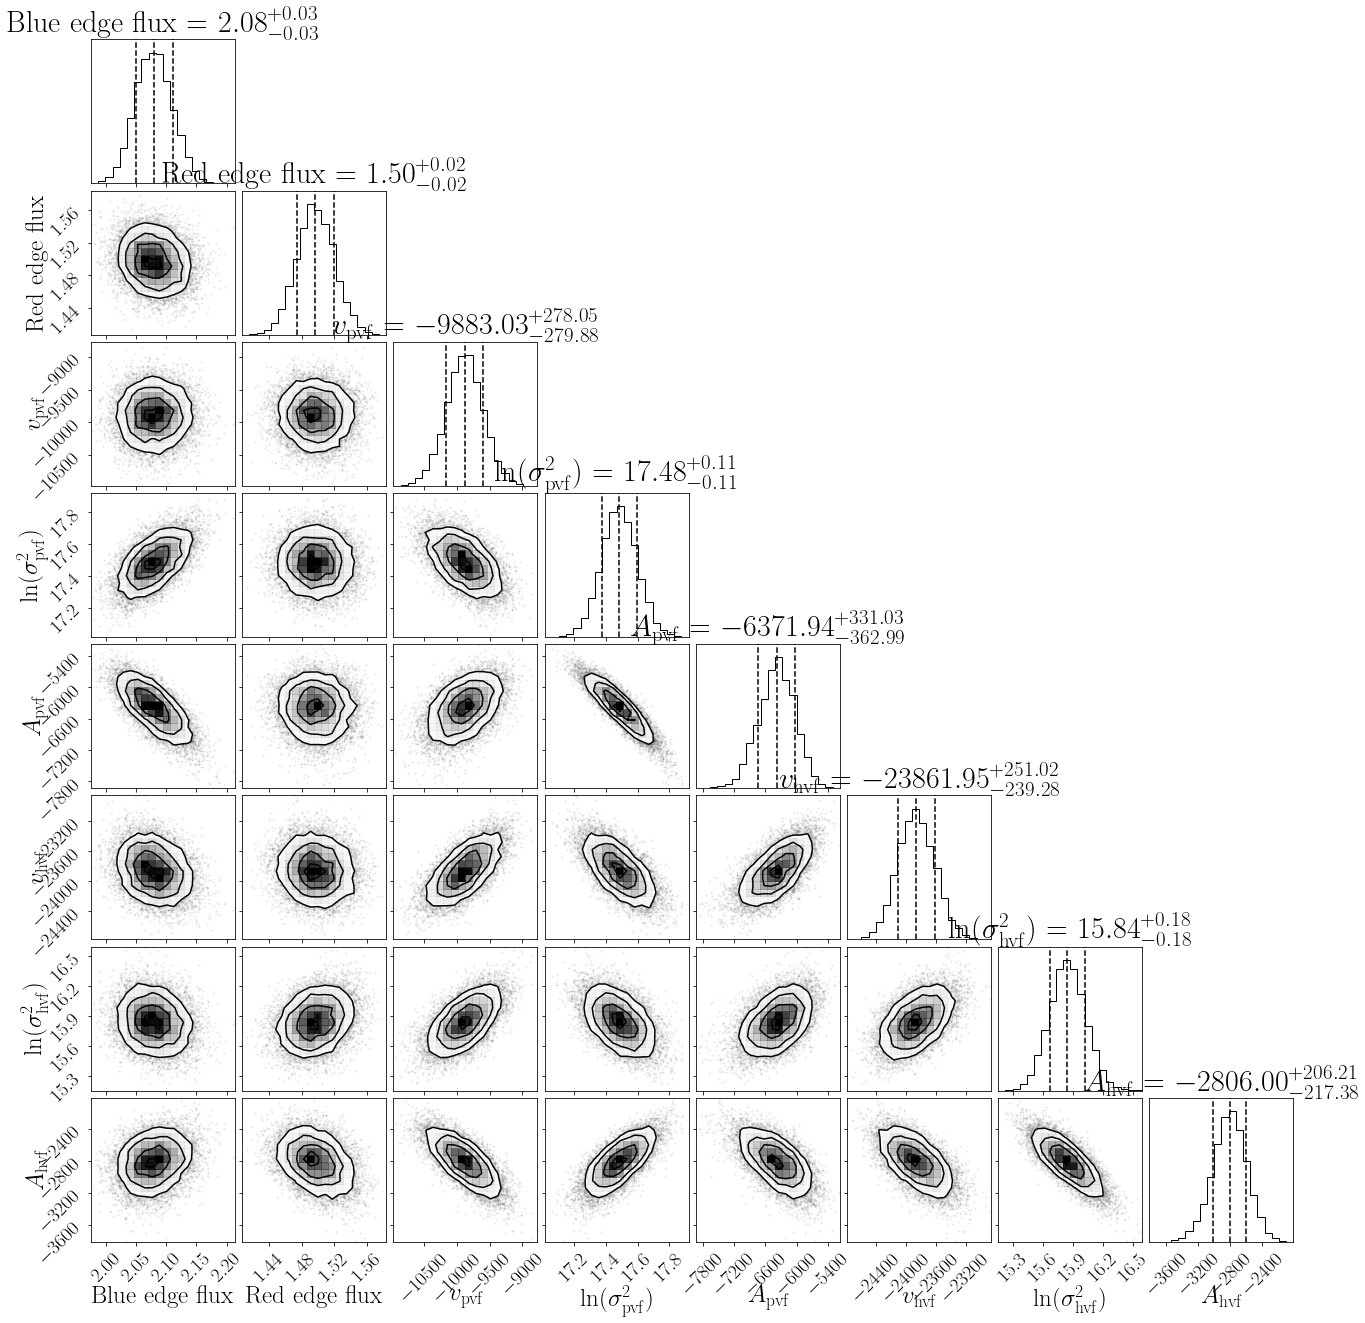

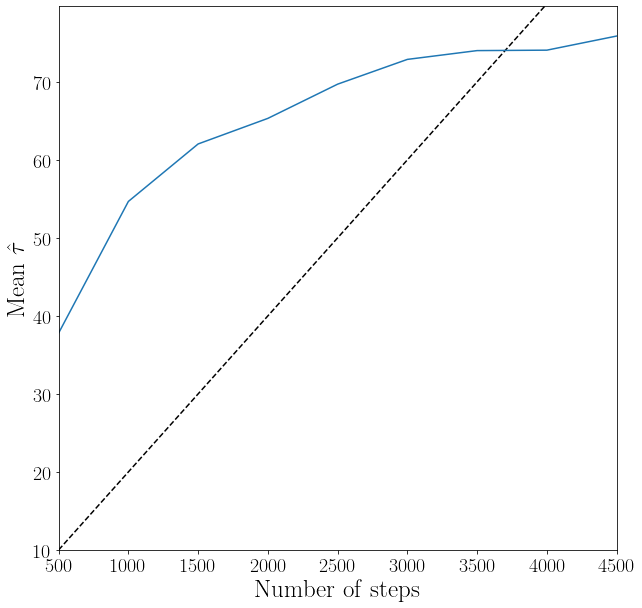

In [6]:
mu_pvf_prior = -9000
var_pvf_prior = 2e2**3
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(mu_pvf=mu_pvf_prior,
                                              var_pvf=var_pvf_prior,
                                              initial=[1, 1, -12000, 15, -1000, -25000, 15, -1000],
                                              normalize_unc=True,
                                              max_nsteps=1000,
                                              Plot_model=False)
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(
    mu_pvf=mu_pvf_prior,
    var_pvf=var_pvf_prior,
    initial=Spec1.line['CaII_IRT'].theta_MCMC,
    normalize_unc=True,
    Plot_mcmc=True,
    Plot_tau=True)